# Air Quality Hypothesis Analysis 

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF);">Abstract</h2>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF) 1;">
    <p><strong>Context:</strong> <br></br>
The increasing concerns about air quality and its effects on public health have underscored the importance of analyzing Air Quality Index (AQI) data. The AQI is a standardized tool that communicates the quality of air in a given area by considering pollutants like PM2.5, PM10, NO2, SO2, CO, and O3. Governments and environmental agencies around the world use AQI measurements to inform the public about pollution levels and to implement strategies to improve air quality.
    </p>  
    <br><br/>
    <p>
    <strong>Objectives:</strong>
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;">Performing location-based and monthly analyses across multiple counties within the NY state, identifying patterns and trends in AQI variations.</li>
        <li style="margin-bottom: 10px;">Conducting a <strong>Two-sample t-test to evaluate the statistical significance of differences in mean AQI between <strong>Upstate New York</strong> & <strong>New York City</strong>.</li>
    </ul>
    <br/>
</div>

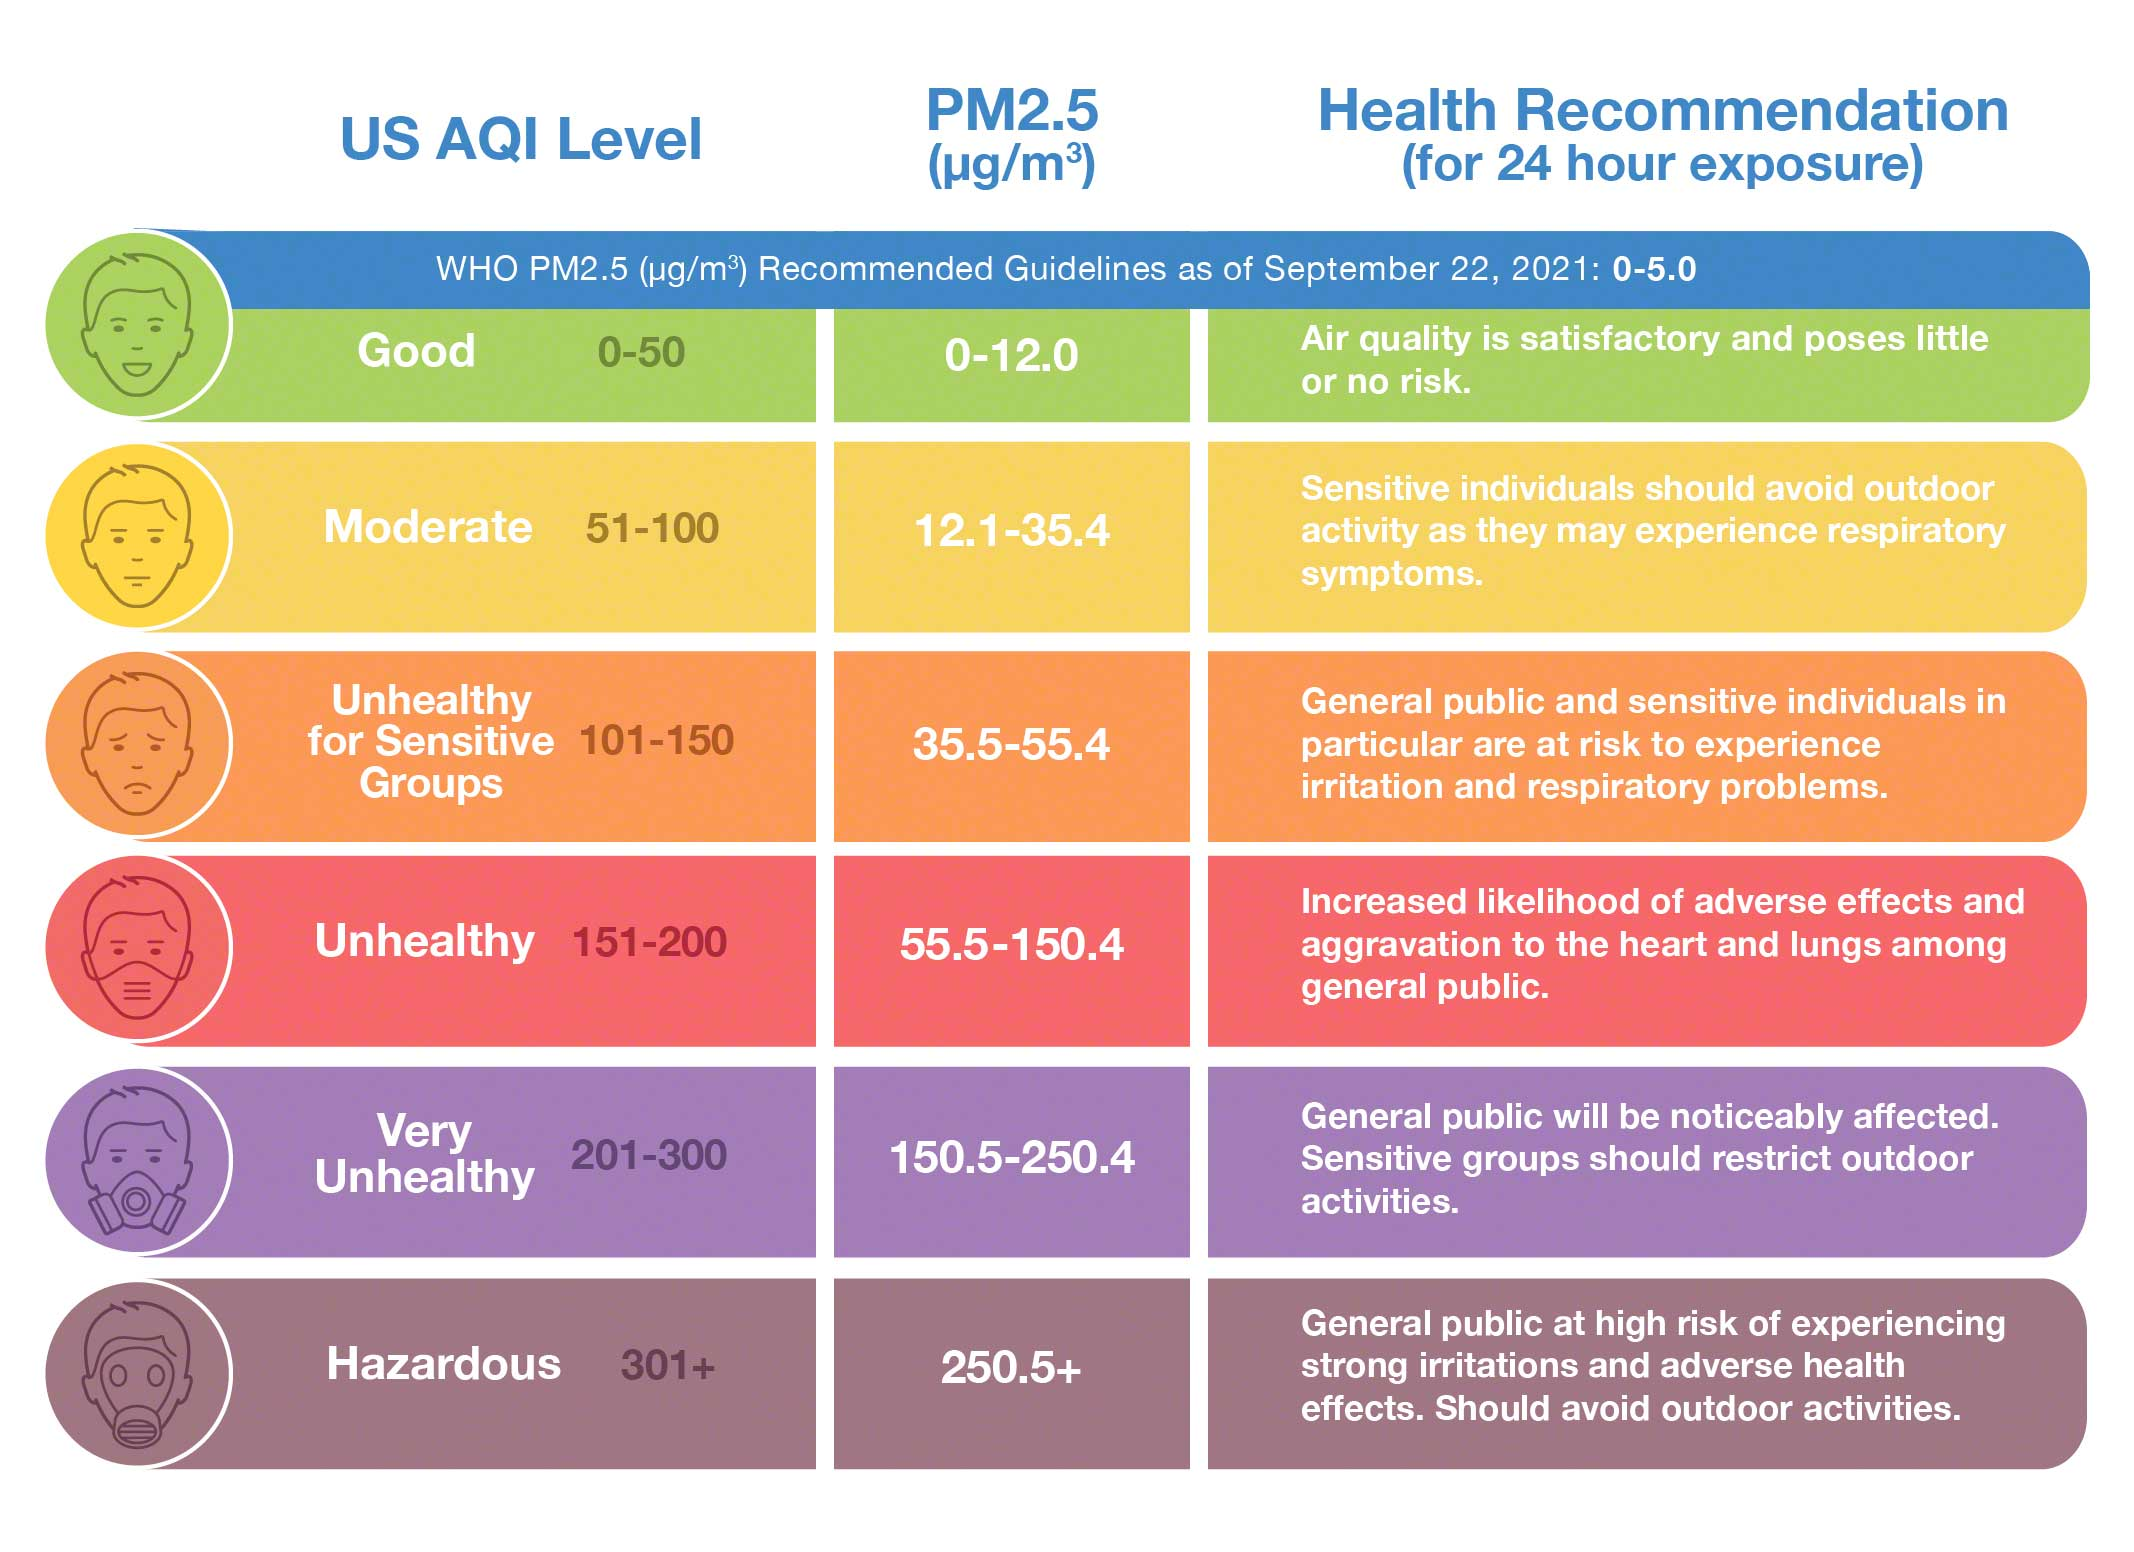

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF);">Methodology</h2>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF) 1;">
    <p>
<strong>Two-sample t-test:</strong> <br>
Is a statistical method used to determine if there is a significant difference between the means of two independent groups. It is commonly used when comparing the means of two separate groups to see if they are significantly different from each other. Assumptions: the two samples are independent of each other. For each sample, the data is drawn randomly from a normally distributed populationand and  the population standard deviation is unkown.
    </p>

<br>
<strong>Two-sample t-test (Means) Formula:</strong> <br>
$$
\Huge t = \frac{(\bar{X}_1 - \bar{X}_2)}{\sqrt{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})}}
$$

* `x̄₁`: sample mean 1
* `x̄₂`: sample mean 2
* `s₁`: sample standard deviation 1
* `s₂`: sample standard deviation 2
* `n₁`: sample size 1
* `n₂`: sample size 2
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF);">Data Dictionary</h2>

<table>
    <tr>
        <th>Variable</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>State Name</td>
        <td>The name of the state where the monitoring site is located.</td>
    </tr>
    <tr>
        <td>county Name</td>
        <td>The name of the county where the monitoring site is located.</td>
    </tr>
    <tr>
        <td>State Code</td>
        <td>The FIPS code of the state in which the monitor resides.</td>
    </tr>
    <tr>
        <td>County Code</td>
        <td>The FIPS code of the county in which the monitor resides.</td>
    </tr>
    <tr>
        <td>Date</td>
        <td>The date on which this data was retrieved from the AQS Data Mart.</td>
    </tr>
    <tr>
        <td>AQI</td>
        <td>The Air Quality Index for the day for the pollutant, if applicable.</td>
    </tr>
    <tr>
        <td>Category</td>
        <td>classification system used to communicate the quality of outdoor air and its potential health effects to the public.</td>
    </tr>
    <tr>
        <td>Defining Parameter</td>
        <td>The parameter measured by the monitor. Parameters may be pollutants or non-pollutants.</td>
    </tr>
    <tr>
        <td>Defining Site</td>
        <td>	
The name of the site (if any) given by the State, local, or tribal air pollution control agency that operates it.</td>
    </tr>
    <tr>
        <td>Number of Sites Reporting</td>
        <td>The number of observations (samples) taken during the day.</td>
    </tr>
</table>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF) 1;">
    <p>For this project, I am working with the <a href="https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI" download>EPA's 2022 Daily AQI Dataset</a> from U.S. Environmental Protection Agency. This project offers novices like me a foundational understanding and practical experience in hypothesis testing and applying statistical methods to draw meaningful insights.
    </p>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF);">Import Packages</h2>

In [1]:
# Import Operational Packages
import pandas as pd
import numpy as np


# Import Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF);">Load Dataset</h2>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #B4D9E7, #EFF3FF, #EFF3FF) 1;">
    <p>
        This DataFrame contains Air Quality Index (AQI) data from all 50 states. For this hypothesis analysis project, I will focus exclusively on New York State. We will filter a subset for New York State to improve code execution speed.
    </p>
</div>

In [2]:
# Load the Dataset from csv. file
data = pd.read_csv('daily_aqi_by_county_2022.csv')
aqi_2022 = pd.DataFrame(data)

In [3]:
# Create a Boolean mask for rows where the state is New York
mask_ny = aqi_2022['State Name']=='New York'


# Use the Boolean mask to filter the DataFrame, retaining only rows for New York
ny_aqi = aqi_2022[mask_ny]


# Display the first 5 rows of the filtered DataFrame
ny_aqi.head(5)

State Name county Name  State Code  County Code        Date  AQI  \
180390   New York      Albany          36            1  2022-01-01   62   
180391   New York      Albany          36            1  2022-01-02   29   
180392   New York      Albany          36            1  2022-01-03   29   
180393   New York      Albany          36            1  2022-01-04   26   
180394   New York      Albany          36            1  2022-01-05   56   

        Category Defining Parameter Defining Site  Number of Sites Reporting  
180390  Moderate              PM2.5   36-001-0005                          2  
180391      Good              Ozone   36-001-0012                          2  
180392      Good              Ozone   36-001-0012                          2  
180393      Good              Ozone   36-001-0012                          2  
180394  Moderate              PM2.5   36-001-0012                          2

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF);">Exploratory Data Analysis</h2>

In [4]:
# Check the unique counties in the ny_aqi dataset
included_counties = ny_aqi['county Name'].unique()


# Return the unique groups in `county Name` column
print(included_counties, end=' ')

['Albany' 'Bronx' 'Chautauqua' 'Dutchess' 'Erie' 'Essex' 'Hamilton'
 'Jefferson' 'Kings' 'Monroe' 'Nassau' 'New York' 'Niagara' 'Oneida'
 'Onondaga' 'Orange' 'Oswego' 'Putnam' 'Queens' 'Richmond' 'Rockland'
 'Saratoga' 'Steuben' 'Suffolk' 'Tompkins' 'Wayne' 'Westchester'] 

In [5]:
# List of all 62 counties in NY state
all_counties_ny = [
    'Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga', 'Chautauqua', 'Chemung', 
    'Chenango', 'Clinton', 'Columbia', 'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 
    'Franklin', 'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson', 'Kings', 
    'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery', 'Nassau', 'New York', 'Niagara', 
    'Oneida', 'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego', 'Putnam', 
    'Queens', 'Rensselaer', 'Richmond', 'Rockland', 'Saratoga', 'Schenectady', 'Schoharie', 
    'Schuyler', 'Seneca', 'St. Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 
    'Ulster', 'Warren', 'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates']


# Find excluded counties thats not have AQI readings
excluded_counties = [i for i in all_counties_ny if i not in included_counties]


# Print number of excluded counties
print('<New York> Number of Counties without AQI readings:', len(excluded_counties), '\n')


# Print excluded county list
print(excluded_counties, end=' ')

<New York> Number of Counties without AQI readings: 35 

['Allegany', 'Broome', 'Cattaraugus', 'Cayuga', 'Chemung', 'Chenango', 'Clinton', 'Columbia', 'Cortland', 'Delaware', 'Franklin', 'Fulton', 'Genesee', 'Greene', 'Herkimer', 'Lewis', 'Livingston', 'Madison', 'Montgomery', 'Ontario', 'Orleans', 'Otsego', 'Rensselaer', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca', 'St. Lawrence', 'Sullivan', 'Tioga', 'Ulster', 'Warren', 'Washington', 'Wyoming', 'Yates'] 

In [6]:
# Check for duplicates
ny_aqi.duplicated().value_counts()

False    9682
Name: count, dtype: int64

In [7]:
# Check for Null values in each column
ny_aqi.isna().sum()

State Name                   0
county Name                  0
State Code                   0
County Code                  0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Defining Site                0
Number of Sites Reporting    0
dtype: int64

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF);">Investigate NY State</h2>

In [8]:
# Get number of AQI readings for each county in NY
ny_aqi['county Name'].value_counts()

county Name
Albany         365
New York       365
Suffolk        365
Steuben        365
Rockland       365
Richmond       365
Queens         365
Onondaga       365
Bronx          365
Westchester    365
Monroe         365
Essex          365
Erie           365
Kings          364
Orange         363
Saratoga       362
Nassau         361
Tompkins       361
Jefferson      360
Niagara        358
Chautauqua     355
Oswego         354
Hamilton       350
Wayne          343
Dutchess       341
Putnam         333
Oneida         332
Name: count, dtype: int64

In [9]:
# Calculate the mean AQI for each county in New York, sort by AQI
ny_mean_aqi = ny_aqi.groupby(['county Name'])[['AQI']].mean().round(1).sort_values(by='AQI', ascending=True).reset_index()


# Display the first 5 rows
ny_mean_aqi.head(5)

county Name   AQI
0      Oneida  21.8
1      Nassau  23.6
2      Orange  31.6
3      Oswego  32.8
4   Jefferson  33.2

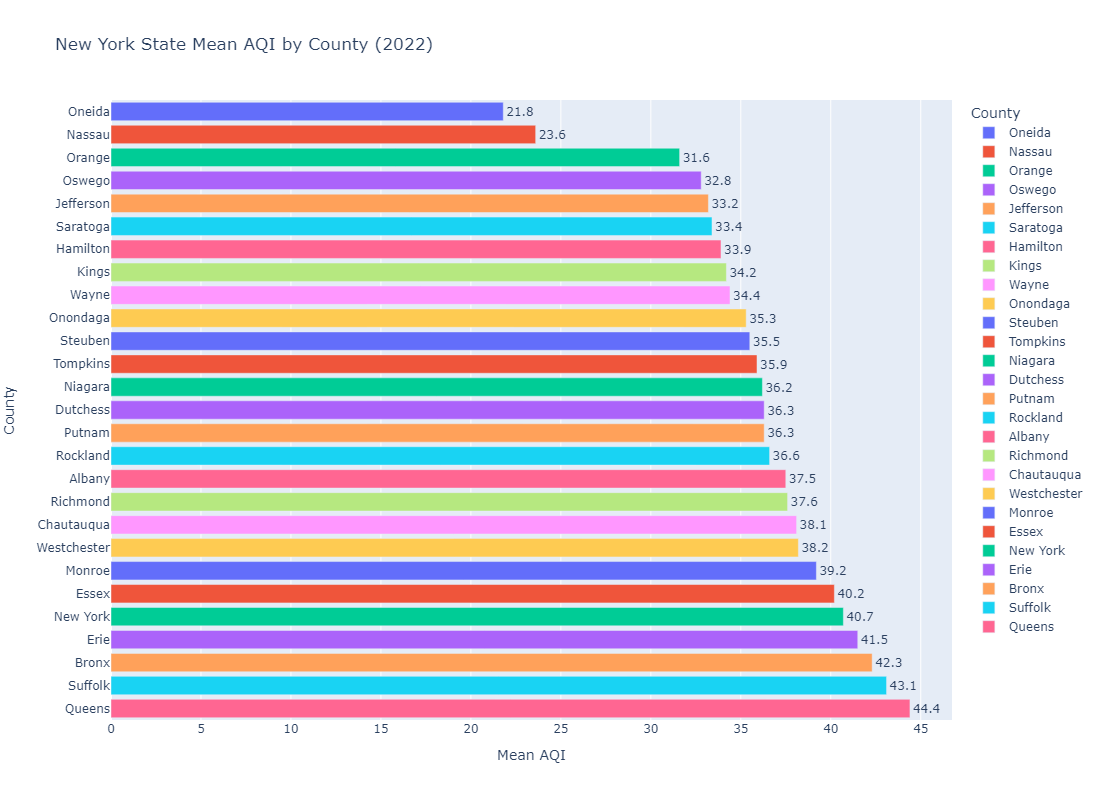

In [10]:
# Create a bar plot
fig = px.bar(ny_mean_aqi ,x='AQI', y='county Name', 
             title='New York State Mean AQI by County (2022)',color='county Name' , text='AQI')


# Update layout
fig.update_layout(
    yaxis_title='County',   
    xaxis_title='Mean AQI',
    legend_title='County',
    width=1100,   # Set the width of the plot
    height=800)   # Set the height of the plot


# (Optinal) Since Github dosen't support plotly.express interactive plots, I will show the static png instead.
fig.write_image("ny_mean_aqi_by_county.png")


# Update traces
fig.update_traces(
    texttemplate='%{text:.3s}',   # Format text to three significant figures
    textposition='outside')       # Position text outside the bars


# Show the plot
fig.show()

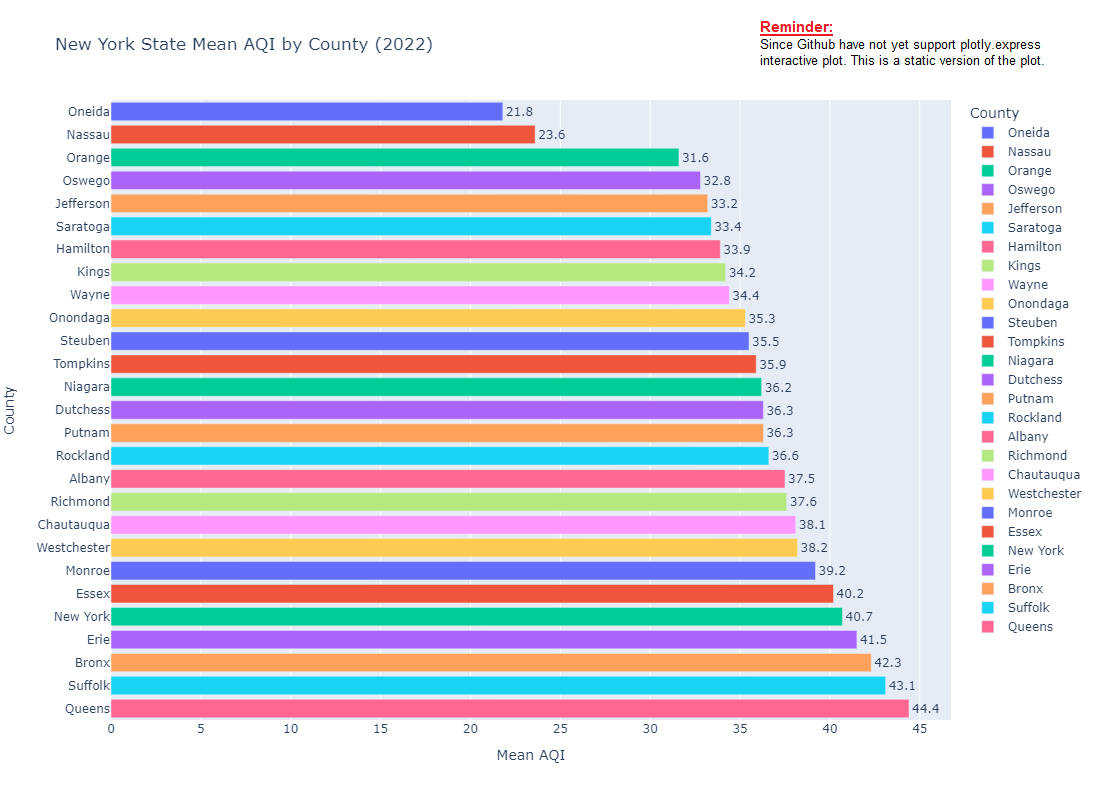

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF) 1;">

<ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;">It appears that Queens County had the highest mean AQI over the year 2022, while Oneida County had the lowest mean AQI during the same period.</li>
        <li style="margin-bottom: 10px;">The average daily AQI for all recorded counties in New York State is below 50, which falls within the Good category.</li>
    </ul>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF);">Categorizing Counties into NYC and Upstate NY</h2>

In [11]:
# Define the list of counties that make up New York City
ny_city = ['New York', 'Bronx', 'Queens', 'Richmond', 'Kings']


# Create a list of upstate counties by excluding NYC counties
ny_upstate = [county for county in ny_aqi['county Name'].unique() if county not in ny_city]

In [12]:
# Define a function that classsfy a county into City or Upstate
def region_classifier(county):

        if county in ny_city:  # Check if the county is part of NYC
            return 'NY City'
        else: 
            return 'Upstate NY'

In [13]:
# Copy the ny_aqi DataFrame into a new DataFrame
ny_state = ny_aqi.copy()


# Apply the region_classifier function to classify each county as 'NY City' or 'Upstate NY' 
ny_state['Region'] = ny_state['county Name'].apply(region_classifier)

In [14]:
# Display the occurrences of each unique value in the 'Region' column
ny_state['Region'].value_counts()

Region
Upstate NY    7858
NY City       1824
Name: count, dtype: int64

In [15]:
# Convert the 'Date' column to datetime format
ny_state['Date'] = pd.to_datetime(ny_state['Date'])


# Extract the abbreviated month text and create a new column 'Month'
ny_state['Month'] = ny_state['Date'].dt.strftime('%b')


# Check modified DataFrame
ny_state.head(2)

State Name county Name  State Code  County Code       Date  AQI  \
180390   New York      Albany          36            1 2022-01-01   62   
180391   New York      Albany          36            1 2022-01-02   29   

        Category Defining Parameter Defining Site  Number of Sites Reporting  \
180390  Moderate              PM2.5   36-001-0005                          2   
180391      Good              Ozone   36-001-0012                          2   

            Region Month  
180390  Upstate NY   Jan  
180391  Upstate NY   Jan

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF);">Data Visualization 1</h2>
</script>

In [16]:
# Convert Category column to Categorical Datatype
ny_state['Category'] = pd.Categorical(ny_state['Category'], 
                                      categories=['Good', 'Moderate', 'Unhealthy for Sensitive Groups'], ordered=True)

ny_state['Category'].dtypes

CategoricalDtype(categories=['Good', 'Moderate', 'Unhealthy for Sensitive Groups'], ordered=True, categories_dtype=object)

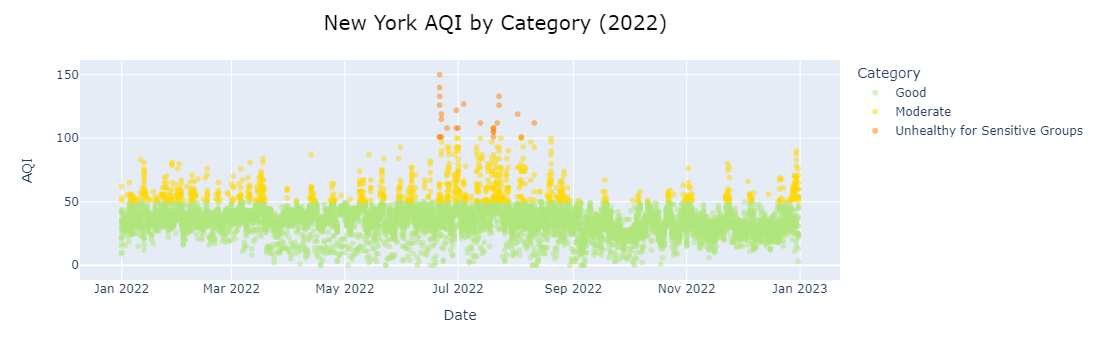

In [17]:
# This dictionary maps air quality categories to their respective colors.
color_map = {'Good': '#B0E57C', 'Moderate': '#FFD700', 'Unhealthy for Sensitive Groups': '#FF7E00'}


# Scatterplot
fig = px.scatter(ny_state.sort_values(by='Category'), x='Date', y='AQI', 
                 color='Category', color_discrete_map=color_map ,opacity=0.5)


# Update figure layout
fig.update_layout(
    title={'text': 'New York AQI by Category (2022)', 'x': 0.45, 'font': {'size': 20, 'color': 'black'}},
    xaxis_title='Date', 
    yaxis_title='AQI')


# Show plot
fig.show()

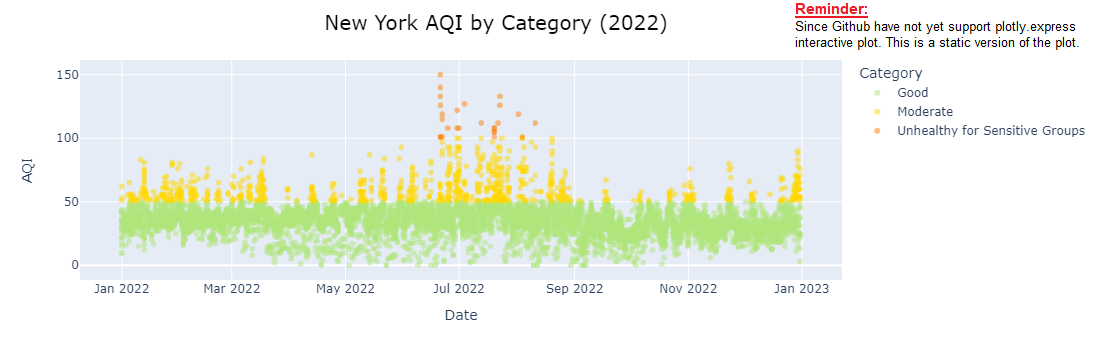

In [18]:
# Calculate the proportion of days that fall into each AQI category
ny_state['Category'].value_counts(normalize=True).round(3)

Category
Good                              0.911
Moderate                          0.087
Unhealthy for Sensitive Groups    0.003
Name: proportion, dtype: float64

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF) 1;">
    <p>The period with the most <span style="color: #FF964F;">Unhealthy for Sensitive Groups</span> AQI days is from June 21st to August 11th. During this period, New York and neighboring states experienced heat waves, which contributed to higher pollution levels and poorer air quality.
 
<br>
<br/>      
        
<strong>In 2022, in New York, air quality category was reported as follows:</strong>
</p>
    <table style="border-collapse: collapse; width: 100%; margin-top: 20px;">
        <tr>
            <th style="padding: 8px; text-align: left;">Category</th>
            <th style="padding: 8px; text-align: left;">day / year %</th>
        </tr>
        <tr>
            <td style="padding: 8px; text-align: left;">Good</td>
            <td style="padding: 8px; text-align: left;">91.1%</td>
        </tr>
        <tr>
            <td style="padding: 8px; text-align: left;">Moderate</td>
            <td style="padding: 8px; text-align: left;">8.7%</td>
        </tr>
        <tr>
            <td style="padding: 8px; text-align: left;">Unhealthy for Sensitive Groups</td>
            <td style="padding: 8px; text-align: left;">0.3%</td>
        </tr>
    </table>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF);">Data Visualization 2</h2>

In [19]:
# Define the order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


# Monthly mean Aqi by Region
ny_month = ny_state.groupby(['Region', 'Month'])[['AQI']].mean().round(1).reset_index()


# Set the 'Month' column to a categorical type with the specified month order
ny_month['Month'] = pd.Categorical(ny_month['Month'], categories=month_order, ordered=True)


# Sort ny_month by 'Month' column
ny_month = ny_month.sort_values(by='Month')

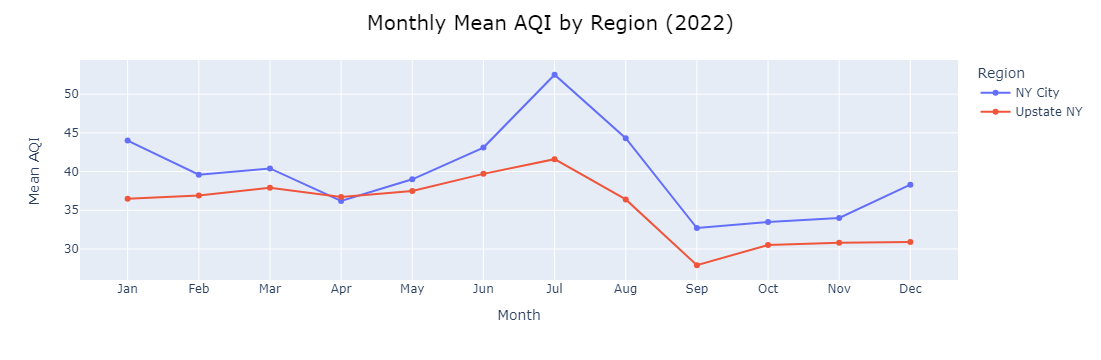

In [20]:
# Create the line plot 
fig = px.line(ny_month, x='Month', y='AQI', color='Region', markers=True)


# Update the layout of the plot
fig.update_layout(
    title={'text': 'Monthly Mean AQI by Region (2022)', 'x': 0.5, 'font': {'size': 20, 'color': 'black'}},
    yaxis_title='Mean AQI',
    xaxis_title='Month')


# Show the plot
fig.show()

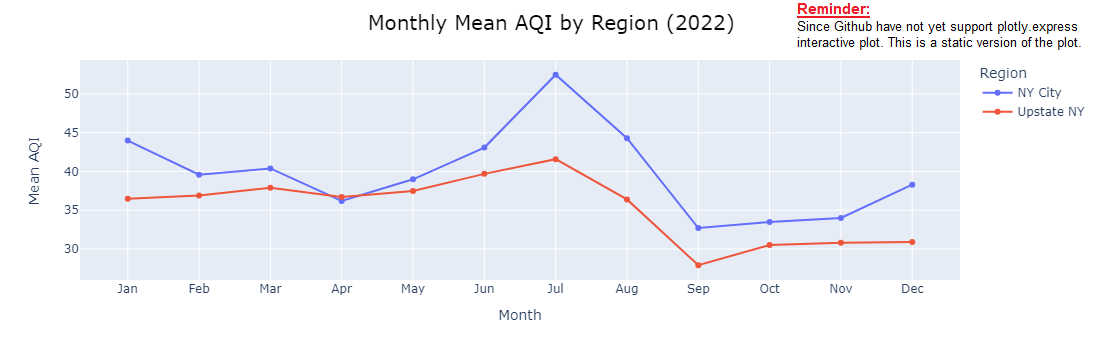

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF) 1;">

<ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;">It's interesting that in the month of April, New York City had a lower AQI than Upstate New York. we might want to explore the underlying reasons for this difference.</li>
        <li style="margin-bottom: 10px;">From early May to early July, both New York City and Upstate experience higher AQI levels, likely due to increased concentrations of pollutants emitted by vehicles, industrial processes, and other human activities.</li>
    </ul>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right,  #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF);">Sampling the Data</h2>

In [21]:
# Separate the data into `NY City` & `Upstate NY`
ny_city_aqi = ny_state[ny_state['Region'] == 'NY City'].reset_index(drop=True)
ny_upstate_aqi = ny_state[ny_state['Region'] == 'Upstate NY'].reset_index(drop=True)

In [22]:
# Take a sample with replacement from New York City AQI data
sampled_ny_city = ny_city_aqi.sample(n=25, replace=True, random_state=906017)


# Take a sample with replacement from Upstat New York AQI data
sampled_ny_upstate = ny_upstate_aqi.sample(n=25, replace=True, random_state=906017)

In [23]:
# Calculate the mean AQI for sampled New York City data
sampled_ny_city_mean = sampled_ny_city['AQI'].mean()
print('Sampled New York City Mean AQI: {:>10}'.format(sampled_ny_city_mean))


# Calculate the mean AQI for sampled New York Upstate data
sampled_ny_upstate_mean = sampled_ny_upstate['AQI'].mean()
print('Sampled Upstate New York Mean AQI: {:>7}'.format(sampled_ny_upstate_mean))

Sampled New York City Mean AQI:      41.04
Sampled Upstate New York Mean AQI:   31.48


In [24]:
# Compute the difference of mean AQI between city & upstate
sampled_mean_aqi_difference = sampled_ny_city_mean - sampled_ny_upstate_mean
print('NY City & Upstate NY Mean AQI difference: {:.3f}'.format(sampled_mean_aqi_difference))

NY City & Upstate NY Mean AQI difference: 9.560


<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF);">Hypothesis Testing</h2>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF) 1;">
    <p>
    Setting up a hypothesis test to determine whether the difference in the mean AQI between New York City and Upstate New York is statistically significant or occur by chance. The hypothesis test formula I will be using is the <strong>two sample t-test (Means).</strong>    
    </p><br>
<p><strong>Step 1:</strong> State the null hypothesis and the alternative hypothesis    </p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;"><code>H0:</code> There is no difference in Mean AQI between NY City and Upstate NY.</li>
        <li style="margin-bottom: 10px;"><code>H1:</code> There is a difference in Mean AQI between NY City and Upstate NY.</li>
    </ul>    
    <br/>
    <p><strong>Step 2:</strong> Choose a significance level</p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;">Signifcant level = 5%</li>
    </ul>
    <br/>
<p>
        <strong>Step 3:</strong> Find The P-value
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;">The probability of observing results as or more extreme than those observed when the null hypothesis is True. </li>
    </ul>
    <br/>
    <p>
    <strong>Step 4:</strong> Reject or Fail to Reject the null hypothesis</p>
</div>

In [25]:
# Choose a Significance level = 0.05
significance_level = 0.05

In [26]:
# Import the T-stats function from scipy.stats
from scipy import stats


# Find T-statistic & P-value
tstat, pvalue = stats.ttest_ind(a=sampled_ny_city['AQI'], b=sampled_ny_upstate['AQI'], equal_var=False)


print('T score:',tstat)
print('P-value:',pvalue)

T score: 3.0550772055753583
P-value: 0.0039132913001006285


In [27]:
# Pvalue greater than our chosen significance_level?
pvalue > significance_level

False

**Insight**
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF) 1;">     
<ul style="margin-bottom: 10px;">
    <li style="margin-bottom: 10px;">
    If the P value is greater tha our significant level of 5%, then we fail to reject the null value. Else P value is less than 5% we will reject the null hypothesis.
    </li>
    <li style="margin-bottom: 10px;">
    P-value: <code>0.0039132913001006285</code>
    </li>
    <li style="margin-bottom: 10px;">
    Significance Level: <code>0.05</code>
    </li>
    </ul>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF);">Conclusion</h2>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF) 1;">     
<ul style="margin-bottom: 10px;">
    <li style="margin-bottom: 10px;">
    From early May to early July, both New York City and Upstate New York experience higher AQI levels. This increase is likely due to elevated concentrations of pollutants from sources such as vehicle emissions, industrial processes, and other human activities. Warmer temperatures during this period can also contribute to the formation of ground-level ozone and other pollutants, further impacting AQI levels.
    </li><br>
    <li style="margin-bottom: 10px;">
    With a P-value of approximately 0.00391, there is a mere 0.391% probability that the observed absolute difference of 9.56 in mean AQI between New York City and Upstate New York occurred by chance. Given that <code>P-value of 0.391%</code> is below our <code>significance level of 5%</code>, <strong>we'll reject the Null Hypothesis. And conclude that there is in fact a statistically significant difference in mean AQI between New York City and Upstate New York</strong>.
    </li>
    </ul>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF);">Further Analysis</h2>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF) 1;">     
<ul style="margin-bottom: 10px;">
    <li style="margin-bottom: 10px;">
    <strong>Subgroup Analysis</strong>: Perform subgroup analyses based on different seasons (e.g., summer vs. winter) or different times of the day to understand if the difference in AQI varies under different conditions.
    </li><br>
    <li style="margin-bottom: 10px;">
    <strong>Time Series Analysis</strong>: Examine temporal trends in AQI over different time periods (e.g., hourly, daily, monthly) to see if the difference between New York City and Upstate New York varies over time.
    </li><br>
    <li style="margin-bottom: 10px;">
    <strong>Public Health Implications:</strong>: Discuss the implications of the findings for public health in both regions. How might the observed difference in AQI impact residents' health outcomes, and are there policy implications for air quality management.
    </li>
    </ul>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF);">Reference</h2>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #98D3E7, #98D3E7, #98D3E7, #B4D9E7, #EFF3FF, #EFF3FF) 1;">
    <p><strong>I would like to mention some excellent references that I learned from:</strong></p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;"><a href="https://www.epa.gov/" target="_blank">https://www.epa.gov/</a></li>  
    </ul>    
</div>